In [1]:
 import numpy as np
 import matplotlib.pyplot as plt
 from sklearn.model_selection import train_test_split
 import os
 import tensorflow as tf
 from tensorflow.keras.preprocessing.image import ImageDataGenerator
 from keras.models import Sequential
 from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
 from keras.optimizers import Adam
 from keras.callbacks import EarlyStopping
 from tensorflow.keras.preprocessing import image  # Import the image functio
 import numpy as np

In [3]:
dataset_path = "brain tumour"


In [5]:
img_width, img_height = 150, 150

In [7]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [9]:
train_data = train_datagen.flow_from_directory(
 os.path.join(dataset_path, 'Training'),
 target_size=(img_width, img_height),
 batch_size=32,
 class_mode='categorical'
 )

Found 2870 images belonging to 4 classes.


In [11]:
test_data = test_datagen.flow_from_directory(
 os.path.join(dataset_path, 'testing'),
 target_size=(img_width, img_height),
 batch_size=32,
 class_mode='categorical'
 )

Found 394 images belonging to 4 classes.


In [13]:

 # Define the CNN model
 model = Sequential()
 # First convolutional layer
 model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 # Second convolutional layer
 model.add(Conv2D(64, (3, 3), activation='relu'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 # Third convolutional layer
 model.add(Conv2D(128, (3, 3), activation='relu'))
 model.add(MaxPooling2D(pool_size=(2, 2)))
 # Flatten layer
 model.add(Flatten())
 # Fully connected layer
 model.add(Dense(128, activation='relu'))
 model.add(Dropout(0.5))  # Dropout to avoid overfitting
 # Output layer (4 classes for tumor types)
 model.add(Dense(4, activation='softmax'))

C:\Users\Sanika_almale\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile the model
model.compile(optimizer='adam', 
loss='categorical_crossentropy', 
metrics=['accuracy'])

In [17]:
# Train the model with automatic steps_per_epoch
history = model.fit(
    train_data,
    validation_data=test_data,
    epochs=10  # You can adjust the number of epochs
 )
 
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f"Test Accuracy: {test_acc}")

C:\Users\Sanika_almale\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.4956 - loss: 1.1335 - val_accuracy: 0.4594 - val_loss: 1.7800
Epoch 2/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7252 - loss: 0.6561 - val_accuracy: 0.5228 - val_loss: 1.7910
Epoch 3/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.8153 - loss: 0.4742 - val_accuracy: 0.6269 - val_loss: 1.8823
Epoch 4/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.8471 - loss: 0.3616 - val_accuracy: 0.5685 - val_loss: 2.4649
Epoch 5/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.8936 - loss: 0.2680 - val_accuracy: 0.6675 - val_loss: 2.3339
Epoch 6/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9386 - loss: 0.1805 - val_accuracy: 0.6954 - val_loss: 2.7394
Epoch 7/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9404 - loss: 0.1608 - val_accuracy: 0.6802 - val_loss: 2.6501
Epoch 8/10
90/90 ━━━━━━━━━━━━━━━━━━━━ 121s 1s/step - accuracy: 0.9588 - loss: 0.1197 - val_accuracy: 0.6954 - v

In [21]:
# Make predictions
predictions = model.predict(test_data)
 # Print the predicted class for the first batch of images
predicted_classes = tf.argmax(predictions, axis=1)
print(predicted_classes)

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 379ms/step
tf.Tensor(
[3 3 2 2 2 0 0 2 1 3 2 3 2 3 3 1 3 3 2 1 2 1 2 3 0 1 1 3 1 1 2 1 3 2 2 2 3
 1 3 2 3 2 1 2 0 1 3 3 1 1 1 1 1 2 1 2 2 1 2 1 1 2 1 0 1 2 2 1 1 1 1 3 1 2
 2 1 2 1 3 0 2 2 1 1 1 1 1 1 2 2 3 2 2 1 1 1 3 1 1 1 2 1 2 1 2 2 2 2 1 3 2
 1 2 2 1 2 1 1 2 1 2 3 2 2 2 3 1 2 2 2 2 1 0 3 1 2 1 1 1 1 2 2 3 1 2 2 1 2
 1 3 1 2 2 1 3 3 2 1 3 1 2 2 3 3 2 3 1 3 3 1 2 3 2 2 1 0 1 2 1 1 1 3 2 2 1
 1 3 3 1 1 1 1 2 2 3 1 3 2 2 2 3 2 3 3 2 2 3 0 1 1 1 1 1 1 2 2 2 2 3 2 2 2
 1 0 3 2 2 3 2 1 2 3 2 1 2 1 1 2 1 3 2 2 1 3 2 2 1 2 2 2 2 2 1 1 1 1 2 1 3
 2 2 2 2 2 2 2 1 3 2 2 3 2 1 1 2 2 1 1 2 0 1 2 1 2 1 3 1 2 1 1 1 1 2 0 1 1
 0 3 1 1 2 2 2 3 2 1 2 1 2 3 0 2 1 2 0 1 2 2 2 3 3 2 3 1 1 2 2 0 2 1 1 2 1
 3 0 2 1 2 2 1 1 1 1 1 0 1 1 2 2 1 2 3 2 1 2 1 1 2 2 2 1 1 3 1 2 2 1 1 2 3
 2 3 1 2 2 2 2 2 1 1 3 2 1 2 1 2 2 1 2 2 3 3 0 2], shape=(394,), dtype=int64)


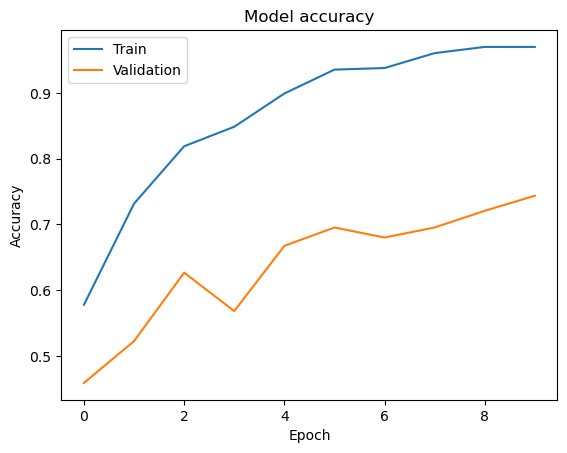

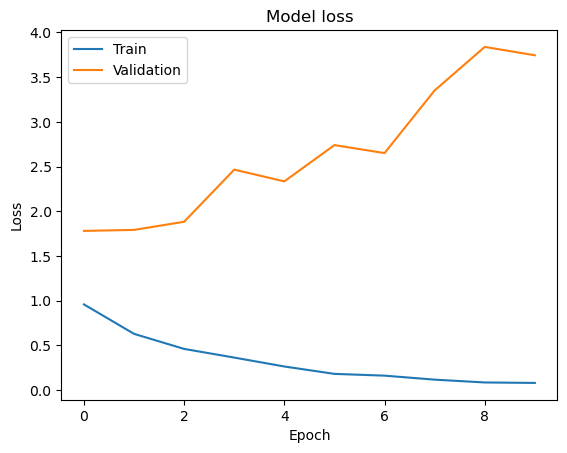

In [23]:
import matplotlib.pyplot as plt
 # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [25]:
def preprocess_image(img_path, img_width, img_height):
 img = image.load_img(img_path, target_size=(img_width, img_height))  # 
 img_array = image.img_to_array(img)  # Convert image to array
 img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension
 img_array /= 255.0  # Normalize the image
 return img_array

In [33]:
img_path = "brain tumour/Training/meningioma_tumor/m (151).jpg"


In [35]:
preprocessed_img = preprocess_image(img_path, img_width, img_height)

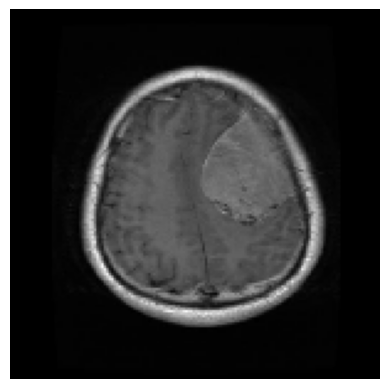

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
The model predicts: meningioma_tumor


In [37]:
plt.imshow(image.load_img(img_path, target_size=(img_width, img_height)))
plt.axis('off')  # Turn off axis
plt.show()

# Make predictions
prediction = model.predict(preprocessed_img)

# Get the predicted class index
predicted_class = np.argmax(prediction, axis=1)

# Class labels
class_labels = ['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']

# Get the class label for the predicted class
predicted_label = class_labels[predicted_class[0]]

# Output the prediction
print(f'The model predicts: {predicted_label}')